# Homework06

Exercises to practice pandas, data analysis and regression

## Goals

- Understand the effects of pre-processing data
- Get familiar with the ML flow: encode -> normalize -> train -> evaluate
- Understand the difference between regression and classification tasks
- Build an intuition for different regression models

### Setup

Run the following 2 cells to import all necessary libraries and helpers for this homework.

In [1]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder

from data_utils import object_from_json_url
from data_utils import StandardScaler
from data_utils import LinearRegression, SGDRegressor
from data_utils import regression_error

### Load Dataset

Let's load up the full [ANSUR](https://www.openlab.psu.edu/ansur2/) dataset that we looked at briefly in [Week 02](https://github.com/DM-GY-9103-2024F-H/WK02).

This is the dataset that has anthropometric information about U.S. Army personnel.

In [3]:
# Load Dataset
ANSUR_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/ansur.json"
ansur_data = object_from_json_url(ANSUR_FILE)

# Look at first 2 records
ansur_data[:2]

[{'age': 18,
  'gender': 'F',
  'height': 66,
  'weight': 135,
  'span': 1699,
  'stature': 1645,
  'ear': {'breadth': 30, 'length': 61, 'protrusion': 20},
  'foot': {'breadth': 97, 'length': 243},
  'hand': {'breadth': 78, 'length': 182, 'palm': 108},
  'head': {'height': 243, 'circumference': 557}},
 {'age': 30,
  'gender': 'M',
  'height': 68,
  'weight': 207,
  'span': 1749,
  'stature': 1715,
  'ear': {'breadth': 35, 'length': 63, 'protrusion': 17},
  'foot': {'breadth': 100, 'length': 252},
  'hand': {'breadth': 87, 'length': 184, 'palm': 114},
  'head': {'height': 238, 'circumference': 560}}]

#### Nested data

This is that *nested* dataset from Week 02.

# 🤔

Let's load it into a `DataFrame` to see what happens.

In [4]:
# Read into DataFrame
ansur_df = pd.DataFrame.from_records(ansur_data)
ansur_df.head()

,age,gender,height,weight,span,stature,ear,foot,hand,head
0,18,F,66,135,1699,1645,"{'breadth': 30, 'length': 61, 'protrusion': 20}","{'breadth': 97, 'length': 243}","{'breadth': 78, 'length': 182, 'palm': 108}","{'height': 243, 'circumference': 557}"
1,30,M,68,207,1749,1715,"{'breadth': 35, 'length': 63, 'protrusion': 17}","{'breadth': 100, 'length': 252}","{'breadth': 87, 'length': 184, 'palm': 114}","{'height': 238, 'circumference': 560}"
2,27,M,67,121,1684,1657,"{'breadth': 36, 'length': 59, 'protrusion': 24}","{'breadth': 92, 'length': 251}","{'breadth': 84, 'length': 180, 'palm': 103}","{'height': 239, 'circumference': 516}"
3,20,M,73,185,1878,1828,"{'breadth': 36, 'length': 60, 'protrusion': 21}","{'breadth': 104, 'length': 280}","{'breadth': 95, 'length': 201, 'palm': 124}","{'height': 270, 'circumference': 582}"
4,33,M,76,150,1977,1883,"{'breadth': 39, 'length': 65, 'protrusion': 27}","{'breadth': 101, 'length': 271}","{'breadth': 90, 'length': 194, 'palm': 113}","{'height': 254, 'circumference': 559}"



# 😓🙄

That didn't work too well. We ended up with objects in our columns.

Luckily, our `DataFrame` library has a function called [`json_normalize()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html) that can help.

In [5]:
# Read into DataFrame
ansur_df = pd.json_normalize(ansur_data)
ansur_df.head()

,age,gender,height,weight,span,stature,ear.breadth,ear.length,ear.protrusion,foot.breadth,foot.length,hand.breadth,hand.length,hand.palm,head.height,head.circumference
0,18,F,66,135,1699,1645,30,61,20,97,243,78,182,108,243,557
1,30,M,68,207,1749,1715,35,63,17,100,252,87,184,114,238,560
2,27,M,67,121,1684,1657,36,59,24,92,251,84,180,103,239,516
3,20,M,73,185,1878,1828,36,60,21,104,280,95,201,124,270,582
4,33,M,76,150,1977,1883,39,65,27,101,271,90,194,113,254,559


Much better. `DataFrames` are magic.

#### Data Exploration

Before we start creating models, let's do a little bit of data analysis and get a feeling for the shapes, distributions and relationships of our data.

1. Print `min`, `max` and `average` values for all of the features.
2. Print `covariance` tables for `age`, `ear.length` and `head.circumference`.
3. Plot `age`, `ear.length` and `head.circumference` versus the $1$ *feature* that is most correlated to each of them.

Don't forget to *encode* and *normalize* the data.

age                     17.0
gender                   0.0
height                  56.0
weight                   0.0
span                  1323.0
stature               1409.0
ear.breadth             25.0
ear.length              46.0
ear.protrusion          13.0
foot.breadth            77.0
foot.length            198.0
hand.breadth            67.0
hand.length            145.0
hand.palm               88.0
head.height            206.0
head.circumference     502.0
dtype: float64
age                     58.0
gender                   1.0
height                  94.0
weight                 321.0
span                  2121.0
stature               1993.0
ear.breadth             46.0
ear.length              81.0
ear.protrusion          34.0
foot.breadth           126.0
foot.length            323.0
hand.breadth           105.0
hand.length            239.0
hand.palm              140.0
head.height            295.0
head.circumference     635.0
dtype: float64
age                     29.745357
gender  

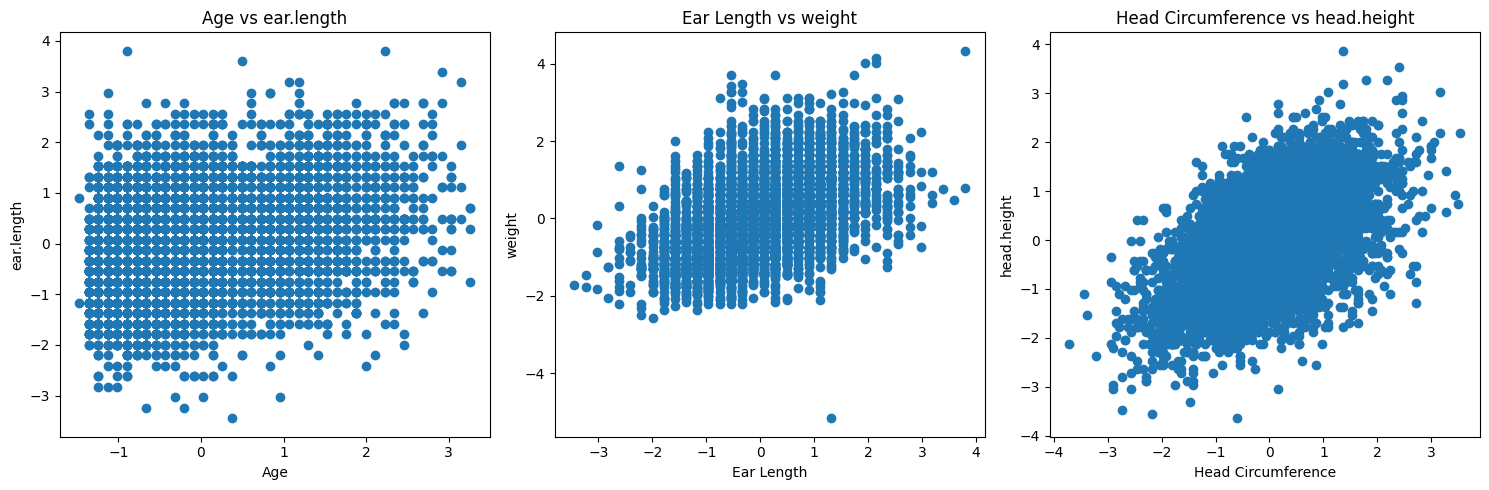

In [ ]:
# Work on Data Exploration here

### Encode non-numerical features
encoder = OrdinalEncoder()
ansur_df[['gender']] = encoder.fit_transform(ansur_df[['gender']]) #M F -> 0 1

## 1. Print min, max, avg
min_vals = ansur_df.min()
max_vals = ansur_df.max()
avg_vals = ansur_df.mean()

print(min_vals)
print(max_vals)
print(avg_vals)

### Normalize all data
scaler = StandardScaler()
ansur_df_scaled = pd.DataFrame(scaler.fit_transform(ansur_df), columns=ansur_df.columns)

## 2. Print Covariances
cov = ansur_df_scaled.cov()
print(cov)

## 3. Plot all features most correlated to age, ear length and head circumference

# Find the most correlated features - made with help from copilot
corr_matrix = ansur_df_scaled.corr()
most_corr_age = corr_matrix['age'].abs().sort_values(ascending=False).index[1]
most_corr_ear_length = corr_matrix['ear.length'].abs().sort_values(ascending=False).index[1]
most_corr_head_cir = corr_matrix['head.circumference'].abs().sort_values(ascending=False).index[1]

# Plot age vs most correlated feature
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(ansur_df_scaled['age'], ansur_df_scaled[most_corr_age])
plt.xlabel('Age')
plt.ylabel(most_corr_age)
plt.title(f'Age vs {most_corr_age}')

# Plot ear length vs most correlated feature
plt.subplot(1, 3, 2)
plt.scatter(ansur_df_scaled['ear.length'], ansur_df_scaled[most_corr_ear_length])
plt.xlabel('Ear Length')
plt.ylabel(most_corr_ear_length)
plt.title(f'Ear Length vs {most_corr_ear_length}')

# Plot head circumference vs most correlated feature
plt.subplot(1, 3, 3)
plt.scatter(ansur_df_scaled['head.circumference'], ansur_df_scaled[most_corr_head_cir])
plt.xlabel('Head Circumference')
plt.ylabel(most_corr_head_cir)
plt.title(f'Head Circumference vs {most_corr_head_cir}')

plt.tight_layout()
plt.show()



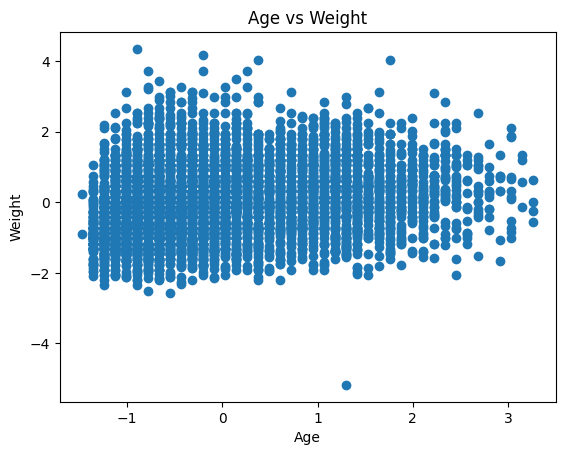

In [13]:
plt.scatter(ansur_df_scaled['age'], ansur_df_scaled['weight'])
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Age vs Weight')

plt.show()

### Interpretation

<span style="color:hotpink;">
Does anything stand out about these graphs? Or the correlations?<br>
Are correlations symmetric? Does the feature most correlated to ear length also have ear length as its most correlated pair?
</span>

<span style="color:yellow;">Head circumferrence vs head height have an obvious positive correlation, followed by ear length vs weight then age vs ear length but none are symmetrical. Although ear length has high, positive correlation with weight, along with ear length vs age, but age and weight do not have a strong correlation. </span>

### Regression

Now, we want to create a regression model to predict `head.circumference` from the data.

From our [Week 06](https://github.com/PSAM-5020-2025S-A/WK06) notebook, we can create a regression model by following these steps:

1. Load dataset (done! 🎉)
2. Encode label features as numbers (done! ⚡️)
3. Normalize the data (done! 🍾)
4. Separate the outcome variable and the input features
5. Create a regression model using all features
6. Run model on training data and measure error
7. Plot predictions and interpret results
8. Run model on test data, measure error, plot predictions, interpret results

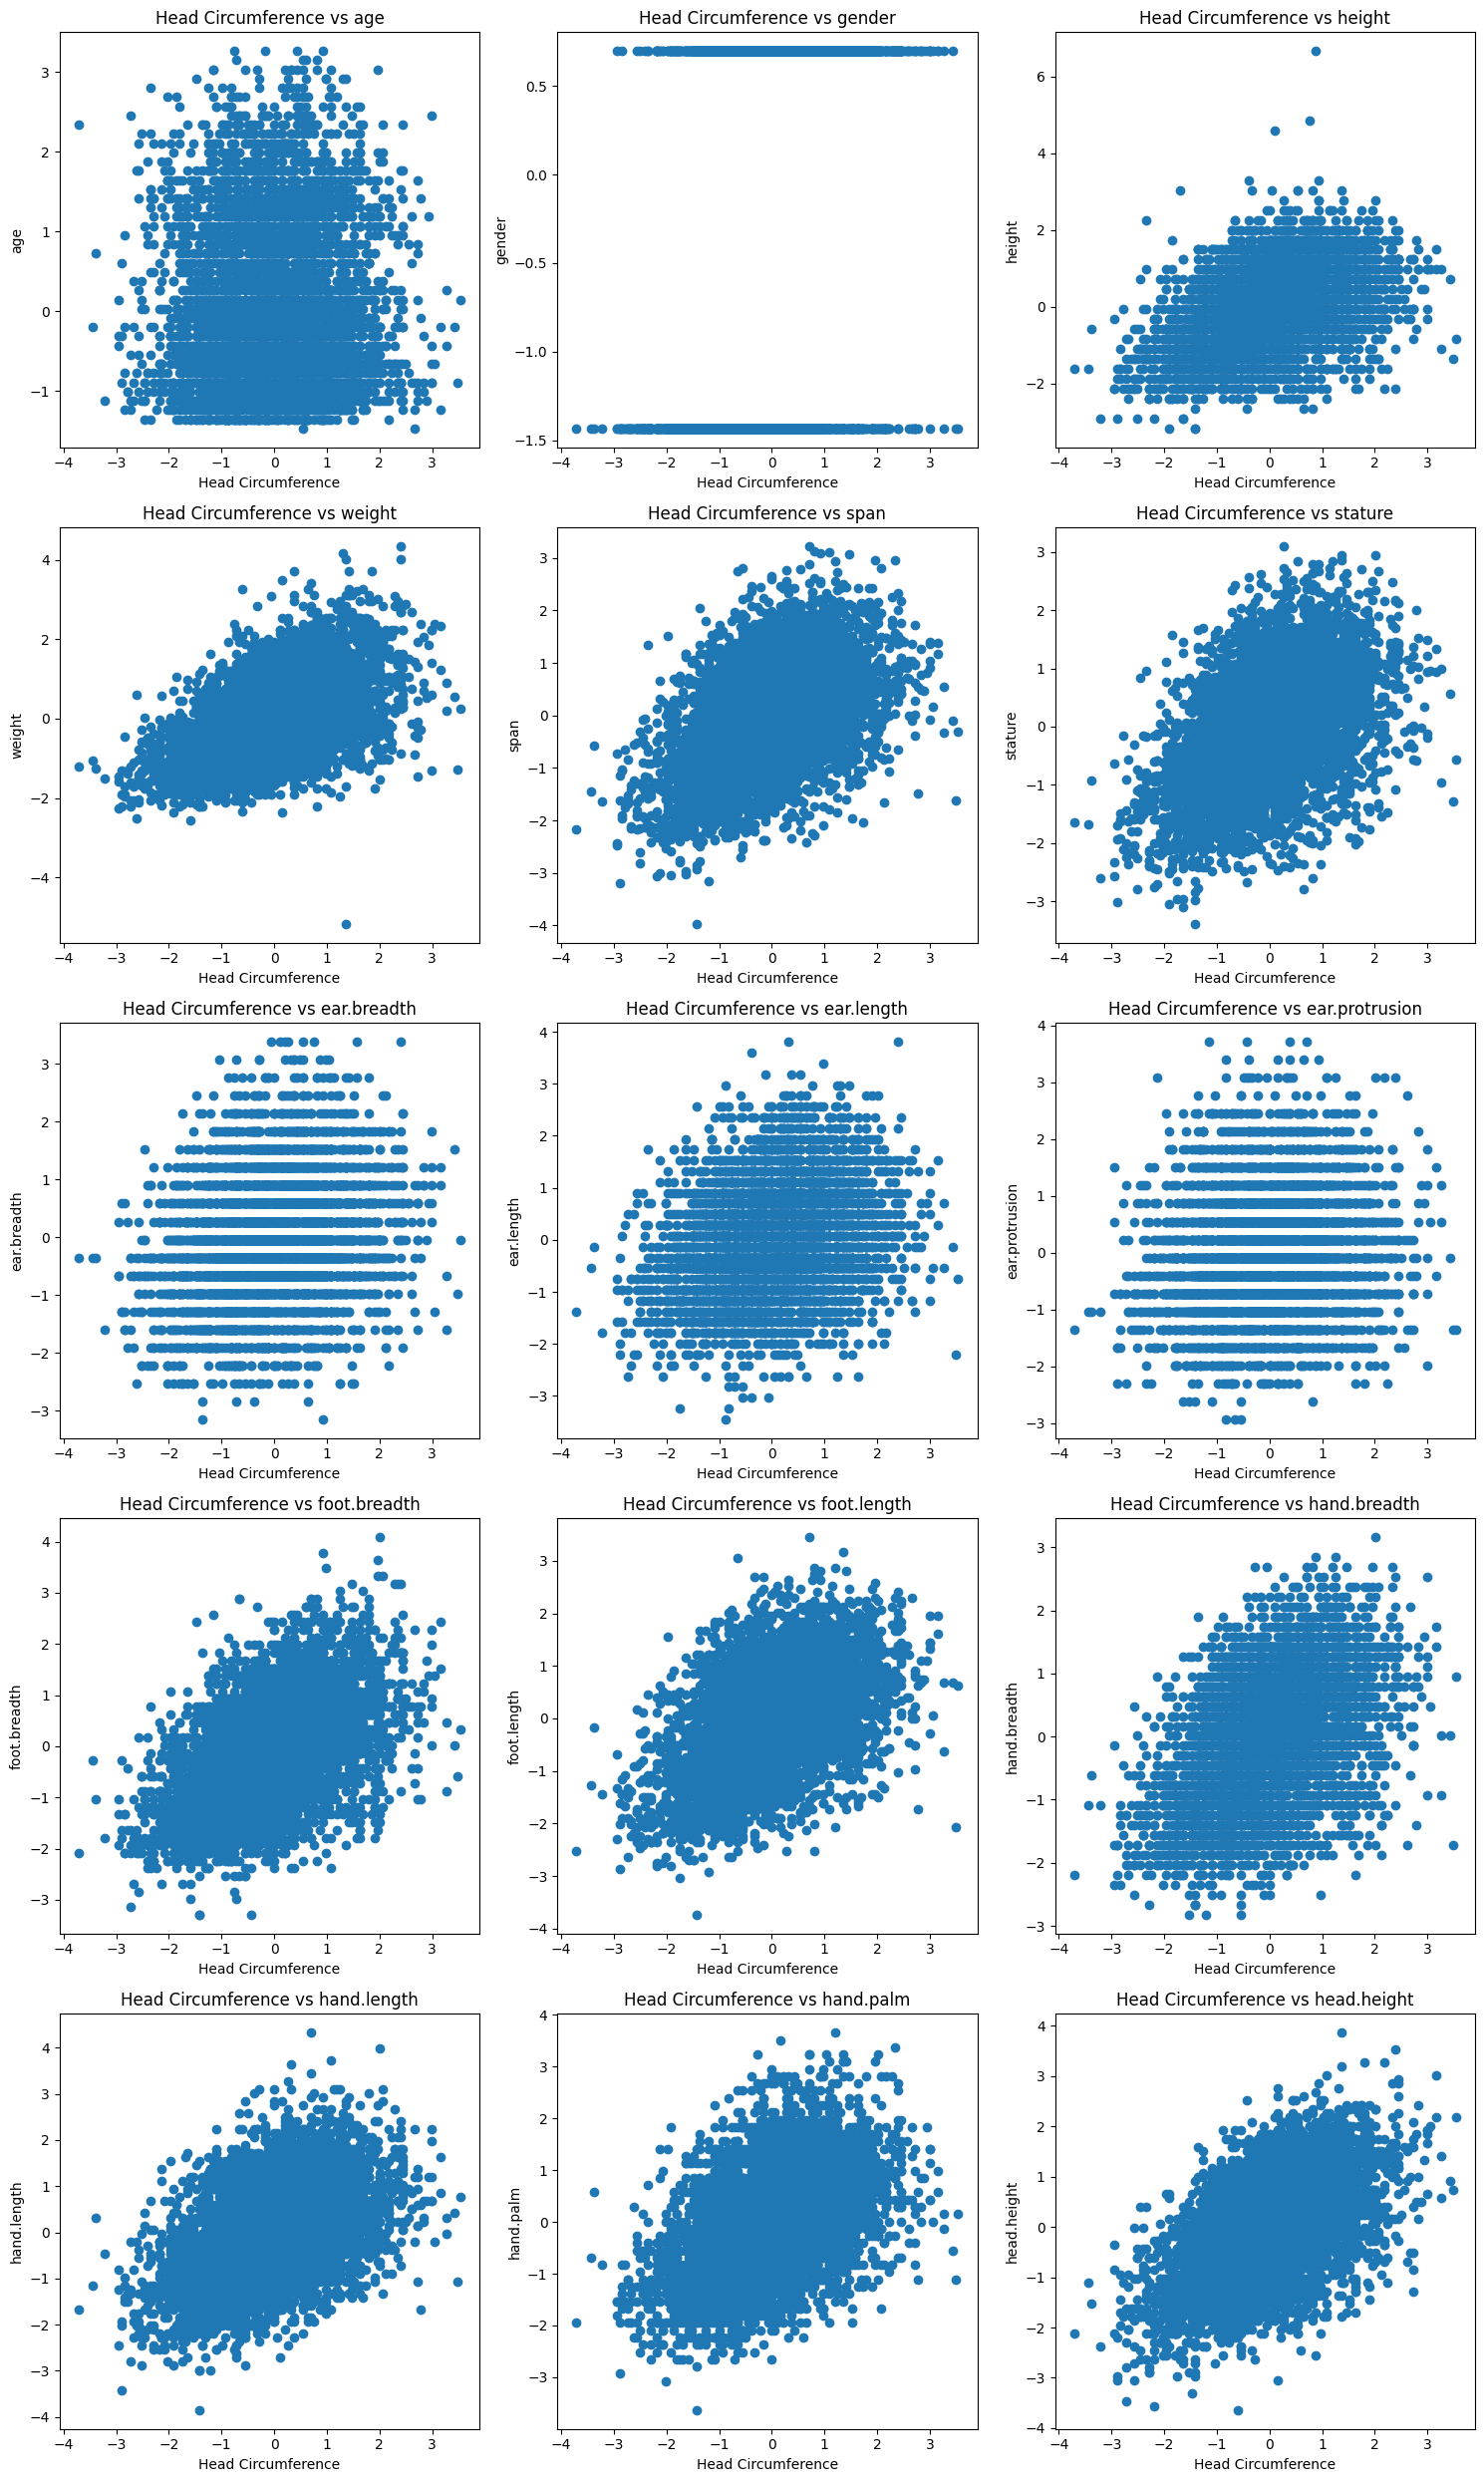

In [ ]:
# Plot head.cir vs all features in 1 image
num_features = len(ansur_df_scaled.columns) - 1  # except 'head.circumference'
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 5))

for i, feature in enumerate(ansur_df_scaled.columns):
    if feature != 'head.circumference':
        plt.subplot(num_rows, num_cols, i + 1)
        plt.scatter(ansur_df_scaled['head.circumference'], ansur_df_scaled[feature])
        plt.xlabel('Head Circumference')
        plt.ylabel(feature)
        plt.title(f'Head Circumference vs {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Work on Regression Model here

## Separate outcome variable and input features
head_cir = ansur_df_scaled["head.circumference"]
features = ansur_df_scaled[["head.height", "head.length", "head.width"]]

## Create a regression model

## Measure error on training data

## Plot predictions and interpret results

In [ ]:
## Load Test Data
ANSUR_TEST_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/ansur-test.json"

ansur_test_data = object_from_json_url(ANSUR_TEST_FILE)
ansur_test_df = pd.json_normalize(ansur_test_data)

ansur_test_encoded_df = ansur_test_df.copy()

g_vals = ansur_encoder.transform(ansur_test_df[["gender"]].values)
ansur_test_encoded_df[["gender"]] = g_vals

ansur_test_scaled_df = ansur_scaler.transform(ansur_test_encoded_df)

In [ ]:
## Run model on test data

## Measure error on test data

## Plot predictions and interpret results

### Interpretation

<span style="color:hotpink;">
How well does your model perform?<br>
How could you improve it?<br>
Are there ranges of circumferences that don't get predicted well?
</span>

<span style="color:hotpink;">EDIT THIS CELL WITH ANSWER</span>